# Feature Encoding

### Need for Encoding
It is not necessary that the data available to us is always in the form of numbers. There are various instances when the data maybe in the form of categories, texts and choices. 
For example, when a person is asked about his/her gender, the response would be *male*, *female* or *other*. It won't be something like 0 or 1. Hence, categorical variables usually find their way into the data most of the time.

## So, what's the problem in that?

The machine learning algorithms developed can handle only numerical values. So, the categorical variables need to be pre-processed and converted or mapped into some numerical values before passing them to the model. This process of mapping categorical variables to numerical values is called **Feature Encoding.**

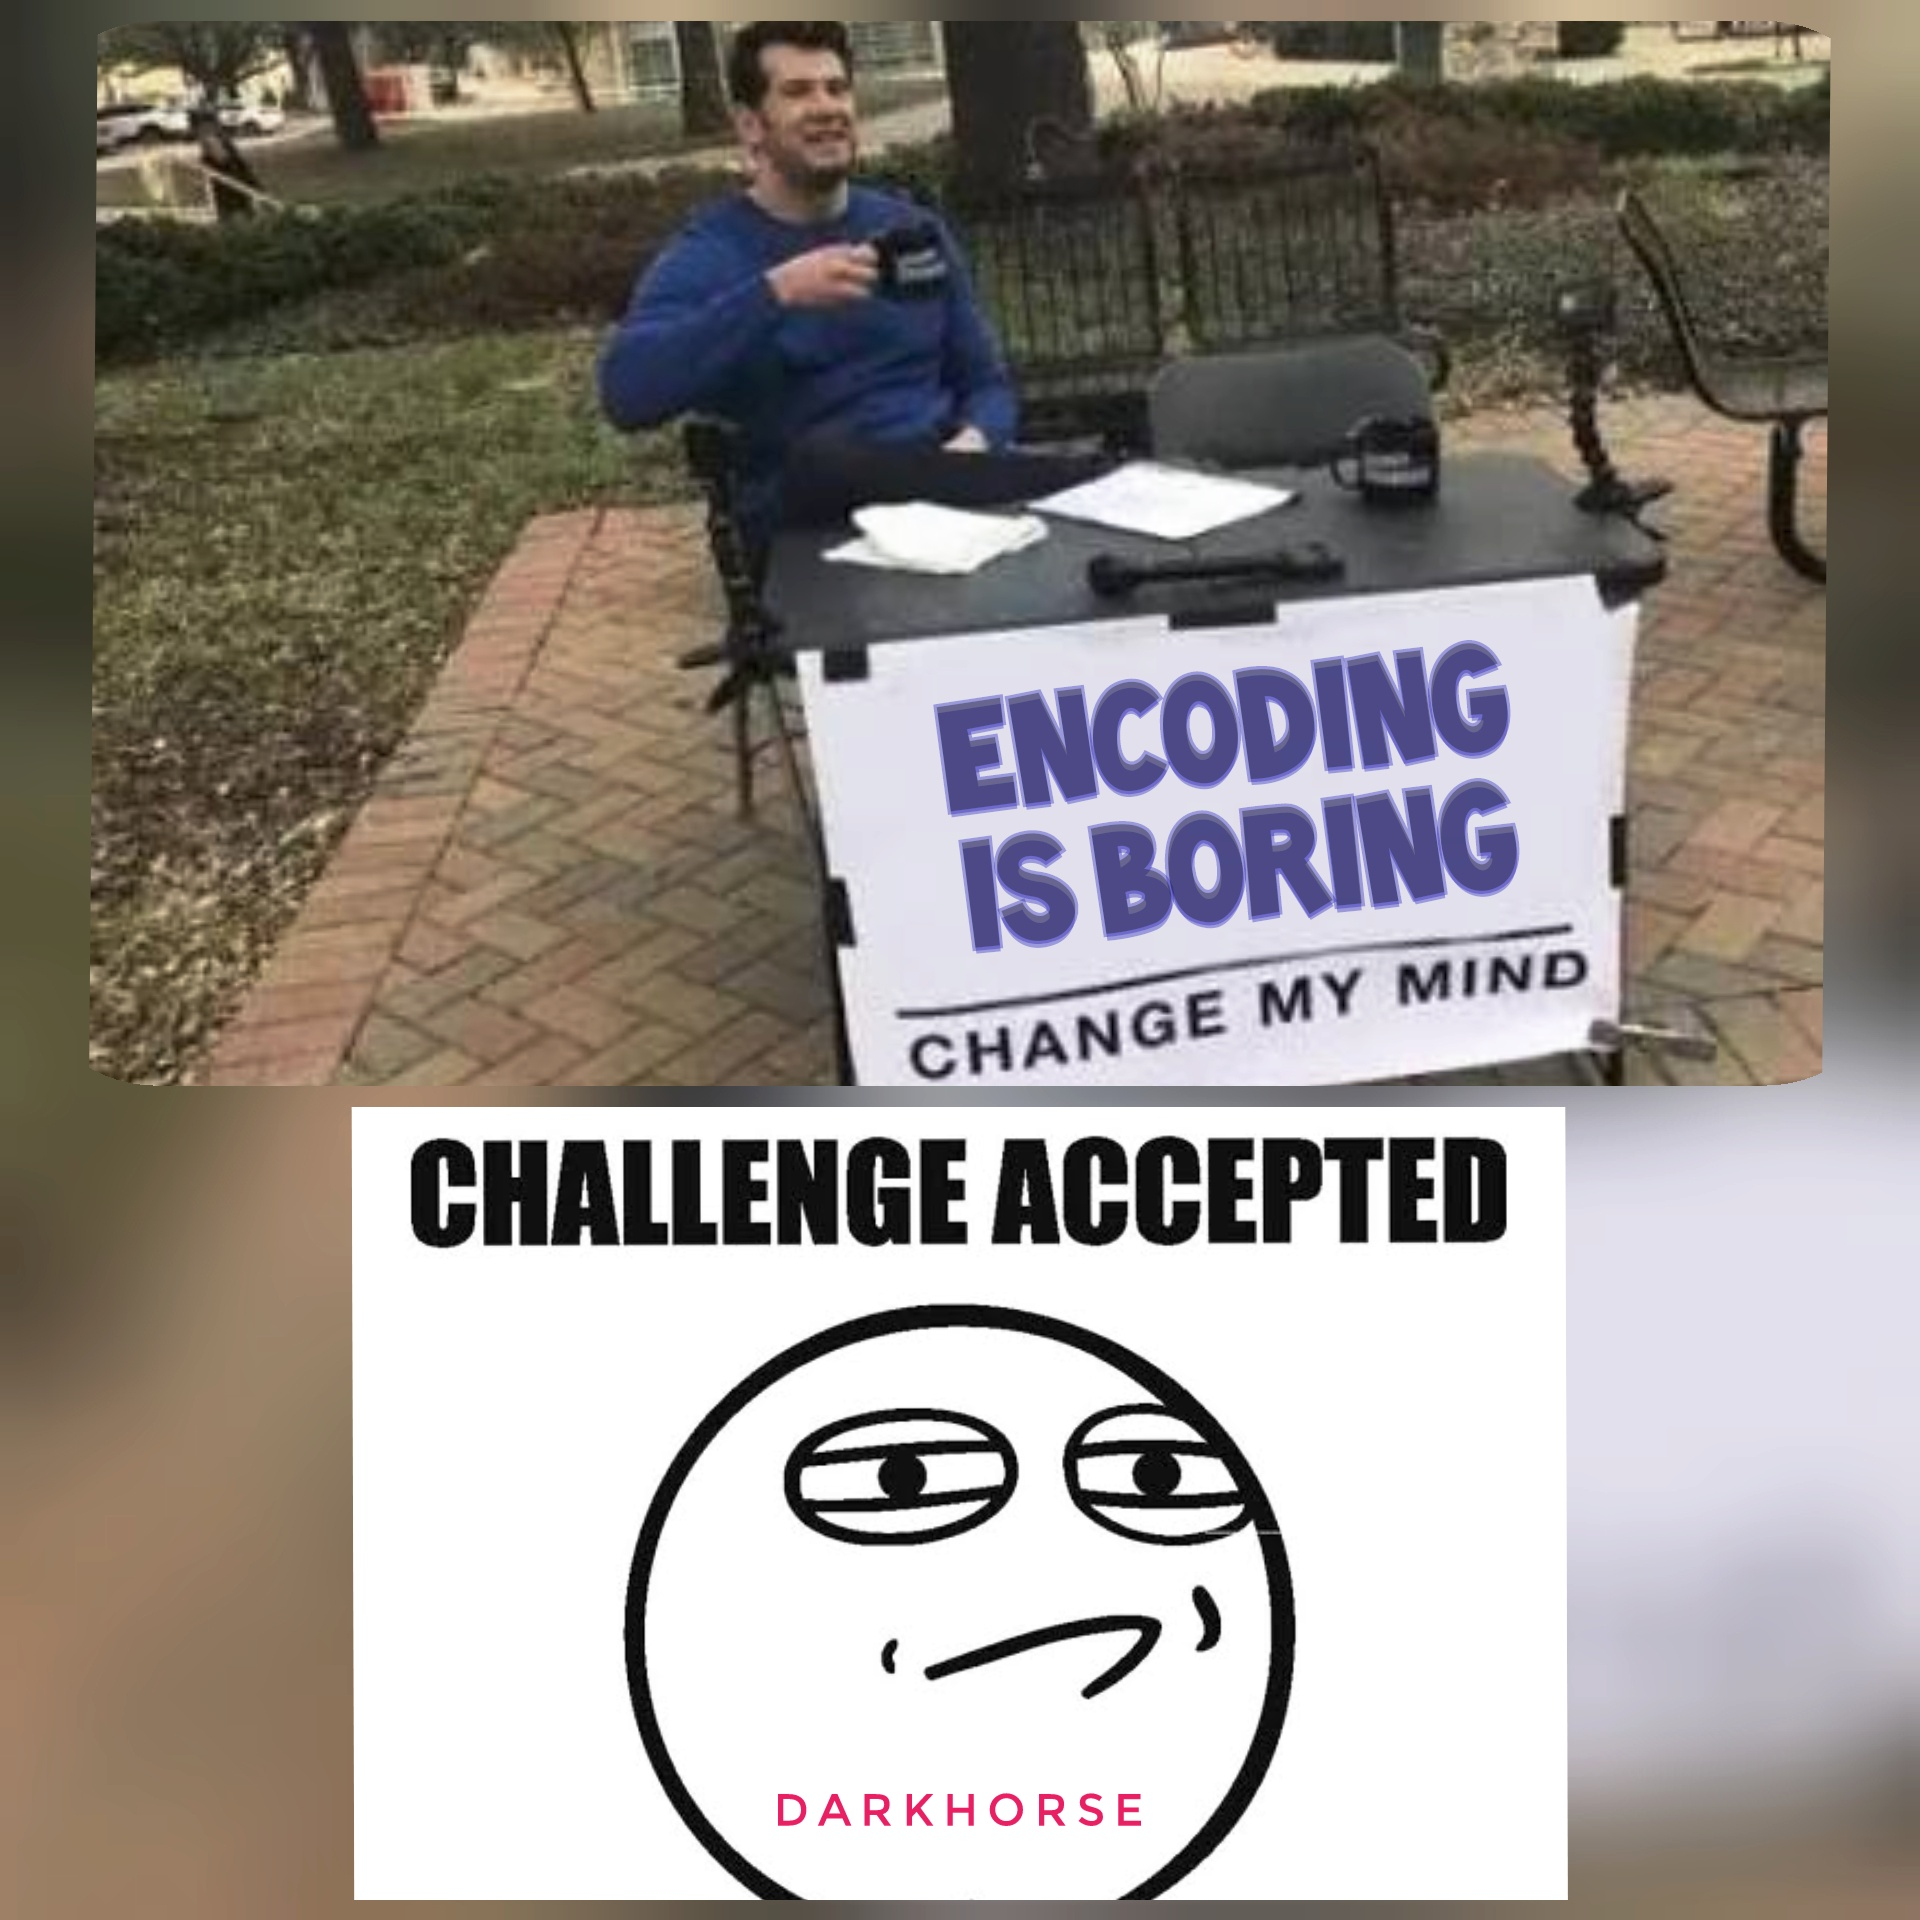

## Importing Libraries 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use("ggplot")
warnings.filterwarnings("ignore")
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## **Importing Data**

In [ ]:
train_data = pd.read_csv("/kaggle/input/cat-in-the-dat/train.csv")
test_data = pd.read_csv("/kaggle/input/cat-in-the-dat/test.csv")
submission = pd.read_csv("/kaggle/input/cat-in-the-dat/sample_submission.csv")

train = train_data.copy()

## Data Statistics

In [ ]:
train_data.shape, test_data.shape

In [ ]:
train.head(2)

In [ ]:
def dataDetails(df):
    res = pd.DataFrame()
    res["Columns"] = list(df.columns)
    res["Missing_Values"] = list(df.isna().sum())
    res["Data_Type"] = list(df.dtypes)
    res["Unique_Values"] = [df[x].nunique() for x in df.columns]
    
    return res

details = dataDetails(train)
details

In [ ]:
X, y = train.drop("target",axis=1), train.target

## Model Function and Performance Monitoring

[Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for Decision Tree Classifier documentation

In [ ]:
def model(X,y):
    from sklearn.model_selection import StratifiedKFold, cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_score,recall_score,f1_score
    
    lr = LogisticRegression()
    cv = StratifiedKFold(n_splits = 10, random_state = 3)
    scores = cross_val_score(lr,X,y,cv=cv)
    
    print("Mean Score : {:.3f}".format(np.mean(scores)))

## Encoding Techniques

# One-Hot Encoding
Let's look at the application of One-Hot Encoding first.

[Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for the Documentation.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

ohe_columns = ["bin_3","bin_4","nom_0","nom_1","nom_2","nom_3","nom_4"]
ohe_result = ohe.fit_transform(train[ohe_columns])

# To help visualize the outputs of OneHotEncoder we will use Pandas get_dummies() method.
# But from implementation-point-of-view, One-Hot Encoder from sklearn is better, as it could be directly used
# to fit into the test data.

ohe_output = pd.get_dummies(train[ohe_columns])
ohe_output.head(2)

**Pandas get_dummies()** function performs One-Hot Encoding on the specified columns and returns a Data Frame containing the *One-Hot Encoded columns*.

[Click Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) for Pandas get_dummies() method documentation.

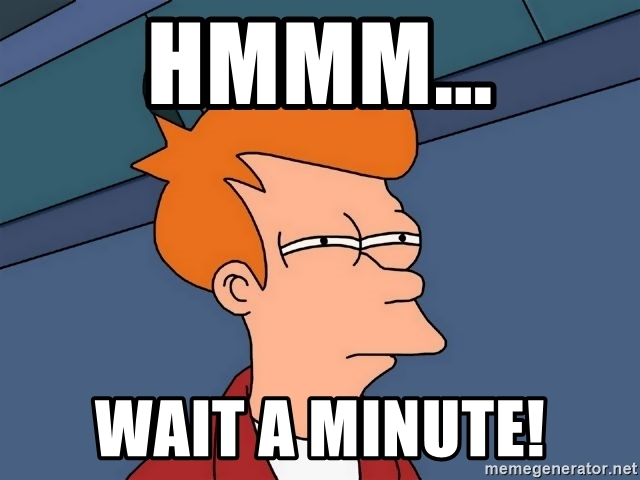

### """ WHAT ABOUT OTHER FEATURES? YOU SELECTED ONLY A FEW OF THEM WITHOUT ANY CONTEXT OR REASON!! TRYING TO ESCAPE, HUH? """

## Definitely not!
Each type of Encoding technique has it's own advantages and disadvantages, making it effiecient in **specific** conditions. If you focus on the output from One-Hot Encodings, you will observe there is an increase in the number of features.
If a feature **X** has **2 categories**, say "**Yes**" and "**No**", One-Hot Encoding would make **2 columns**; one for "Yes" and other for "No". Now let's assume, if **X** has an entry "**Yes**" in it, then corresponding to that row, "**X_Yes**" (*the new column created by One_Hot Encoder*) will have **1** while the "**X_No**" will have **0** in it.

For example, look at the image below.
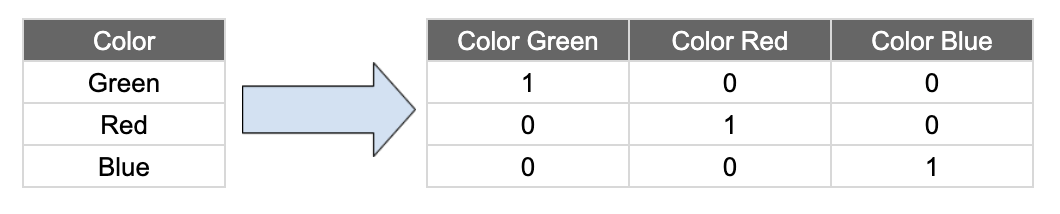
We have 3 categories in the "Colour" feature. Hence, One-Hot-Encoder makes 3 new columns against it, namely "Colour Green","Color Red" and "Color Blue". For a record with Color as Green, the column "Color Green" contains 1 and the rest of the columns have 0 in them.
## Did we really need 3 additional columns for the above example? NO!!

### One-Hot encoding results in the famous Dummy Variable Trap and multicollinearity. [Click Here](https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a) to know more.

If you look at the last row of the above table,
Color = Blue
Now, the "**Color Green**" and "**Color Red**" have **0** in them. So, it's **obvious** that "**Color Blue**" will have **1**.
Go to the documentation for Pandas Documentation for get_dummies() method. You will see a parameter called **drop_first**. If **drop_first** is set to **True** (*by default it's set to False*), the first level is dropped. In simple words, if you have **N** categories in a feature, setting **drop_first** to **True** will create **N-1 new columns instead of N.**

A simple example,

If you proposed to your crush and they say "**Yes**", then it's obvious to you that they didn't say "**No**".
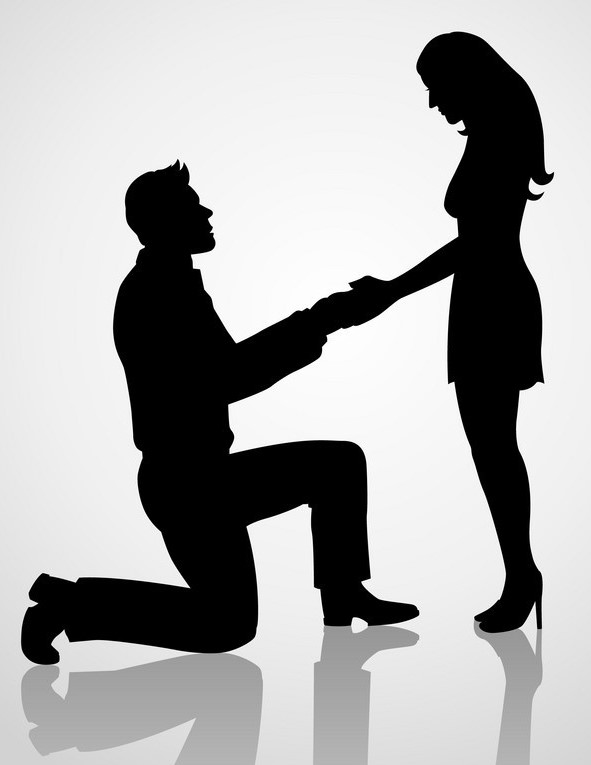
PS: I hope she says **YES**!

### **When number of categories is large, the number of newly created columns by One-Hot Encoder is huge too. Hence, in this tutorial only a selected features were used for One-Hot Encoding, which have less than 7 categories in it.**

## Question : Why weren't the columns named "ord_1" and "ord_2" encoded via One-Hot Encoding? They too had frequency of categories less than 7.
## Answer : Because they are Ordinal Features and they need to be handled through other encoding techniques.
### If you are not familiar with "**Ordinal**" and "**Nominal**" data types, [Click Here](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee).

# Ordinal Encoding
It is used in case of **Ordinal** features and is very useful if the priority of the categories is known beforhand.

[Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) for the documentation of Ordinal Encoder.

### Let's examine the categories present in the "ord_2" feature of the dataset.

In [ ]:
train.ord_2.value_counts()

If the problem statement demands that the categories in "**ord_2**" feature has **priority** according the level of 
hotness/temperature, then

Priority Order:
#### Freezing < Cold < Warm < Hot < Boiling Hot < Lava Hot

This priority order could be easily fitted into the Ordinal Encoder object through the parameter called "**categories**". For more information [Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

In [ ]:
categories = [["Freezing","Cold","Warm","Hot","Boiling Hot","Lava Hot"]]
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=categories, dtype = int)
out = oe.fit_transform(np.array(train.ord_2).reshape(-1,1))

### Let's look at a few outputs from the Ordinal Encoding

In [ ]:
for i in range(10):
    print(str(train.loc[i,"ord_2"])+" --> "+str(out[i][0]))

# Label Encoding
It encodes the target variables to numerical value according to alphabetical order (in case of strings).

[Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) for the Label Encoder documentation.

### Let's test Label Encoding on "nom_5" feature in the dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_out = le.fit_transform(np.array(train.nom_5).flatten())

### Let's look at a few outputs from the Label Encoding

In [ ]:
for i in range(10):
    print(str(train.loc[i,"nom_5"])+" --> "+str(le_out[i]))

## What's the difference between Ordinal Encoder and Label Encoder? They seem to be performing the same task!

### Ordinal Encoder and Label Encoder perform the same function. However, Ordinal Encoder is designed for features and can accept input in the shape of (n_samples, n_features), but Label Encoder is made for labels and hence they accept input in the shape of (n_samples,)

### However, our work with the nominal feature encoding isn't done yet!
# REMEMBER!
## The nominal features don't have a sense of priority or order in them unlike Ordinal features.
### Hence, simply leaving them after encoding with Label Encoder or Ordinal Encoder will give the ML model a wrong impression about those features. Unwanted weightage might be given to some of the categories in the nominal features. 
For example, look at the following outputs from Label Encoding above.

50f116bcf --> 78

b3b4d25d0 --> 159

### The model will interpret the above encoding as : Priority(b3b4d25d0) > Priority(50f116bcf), which is absurd and not at all relevant. This may lead to poor performance for the model.

### Hence, for nominal features One-Hot Encoding is usually performed after Label/Ordinal Encoding.


In [ ]:
le_out_ohe = ohe.fit_transform(np.array(le_out).reshape(-1,1))

## So far, So good!
### However, let's look at the shape of the output after One-Hot Encoding the Label-encoded nominal features.

In [ ]:
print("Shape: {}".format(le_out_ohe.shape))

## 222 columns!

That's a tremendous increase in the number of columns! Even if **drop_first** is set to **True**, there will be **221** columns!

## Is there any other way? Obviously there is!

# BINARY ENCODING

In [ ]:
# if category_encoders isn't installed, use !pip install category_encoders
be_col = train[["nom_5","nom_6","nom_7","nom_8","nom_9"]]
import category_encoders as ce
be = ce.binary.BinaryEncoder()
be_out = be.fit_transform(be_col,y)

In [ ]:
be_out.shape

### One-Hot Encoding ended up creating 222 new columns for a SINGLE feature. However, Binary Encoding added 60 new columns in total for 5 features.

### How did this happen?

## Working of Binary Encoding
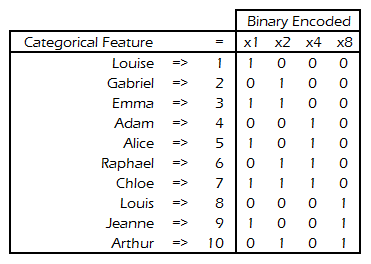

In Binary Encoding, the Label Encoded value is converted into **Binary Number System**.

For N categories in a feature, One-Hot Encoding would use atleast N-1 new columns. Let's see how many columns Binary Encoding would need.
Let the number of columns needed be n


To represent all the categories, 
***2N*** $\gt$ **$2^n$ $\geq$ *N***
$\implies$ $\log_2 2N$ $\gt$ n $\geq$ $\log_2 N$


It can be easily interpreted from the [graph](https://imgur.com/Uz8vd0U) that,

$\log_2 N$ $\lt$ N-1, for all $N\gt 2$

and

$\log_2 2N$ $\lt$ N-1, for all $N\gt 4$

If you didn't get the logic behind the terms 2N and N, [Click Here](http://)
## Hence, Binary Encoding will result in significantly lesser number of new columns as compared to One-Hot Encoding.



### Some More Encoding Techniques

# Feature Hasher

Feature Hashing is generally used in [Natural Language Processing](https://machinelearningmastery.com/natural-language-processing/), where it helps to counter and minimize the problem of **high dimensionality** and **sparse data** in the dataset. Refer to this [video](https://www.youtube.com/watch?v=z9irRiTdDoE) for more guidance.

[Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html) for the Feature Hasher documentation.

In [ ]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(input_type='string')
X_hash = X.ord_2.astype(str)
fh_out = fh.fit_transform(X_hash.values)
fh_out.shape

By default, number of columns in Feature Hashing is **2<sup>20</sup> = 1048576**

It can be changed via the parameter **n_features**

In [ ]:
fh = FeatureHasher(input_type='string',n_features=20) #n_features = 20
X_hash = X.ord_2.astype(str)
fh_out = fh.fit_transform(X_hash.values)
fh_out.shape

# Combining Everything

In [ ]:
# One-Hot Encoding
ohe_columns = ["bin_0","bin_1","bin_2","bin_3","bin_4"]
ohe_out = pd.get_dummies(train[ohe_columns],drop_first=True)

# Nominal Feature Encoding : Binary Encoding or (Ordinal Encoding + Label Binarizer)
import category_encoders as ce
nom_columns = ["nom_0","nom_1","nom_2","nom_3","nom_4","nom_5","nom_6","nom_7","nom_8","nom_9"]
be = ce.BinaryEncoder(return_df = True)
be_out = be.fit_transform(train[nom_columns],y)

# Ordinal Feature Encoding : Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(dtype=int)
ord_columns = ["ord_1","ord_2","ord_3","ord_4","ord_5"]
ord_out = oe.fit_transform(train[ord_columns])
ord_out = pd.DataFrame(ord_out,columns=ord_columns)

new_train = pd.concat([ohe_out,be_out],axis=1)
new_train["ord_0"] = train["ord_0"]
new_train = pd.concat([new_train,ord_out],axis=1)

In [ ]:
model(new_train,y) #fitting and calculating model performance

## There are a lot of feature encoding techniques out there. In this notebook I have mentioned about a few of them, which are mostly used and their usefulness. 

Do access the following links for more details:

1) https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca

2) https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

## Also, I haven't focused much on the model and performance portion as the motive of this notebook inclined more towards the encoding techniques. 

## If you enjoyed reading it, do upvote.

## Contact for any doubts or clarification on the content.